Zepto Final Project

Importing Libraries - Importing all the required libraries which is to be used in this project.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Reading both the datasets
df_sales = pd.read_csv("zepto_sales.csv")
df_products = pd.read_csv("zepto_products.csv")

In [14]:
#Basic Information about Sales Data
print("\n Sales Data info")
#It will give us the count of null and non-null
print(df_sales.info())             
print("\n Sales Data Description")
print(df_sales.describe())
print("\n Sales Data Shape")
#it will give us the count of rows and columns
print(df_sales.shape)
print("\n Sales Data Head")
#It will give the top 5 from the sales data

print(df_sales.head())
print("\n Sales Data Tail")
#It will give the bottom 5 from the sales data
print(df_sales.tail())


 Sales Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220220 entries, 0 to 220219
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            220220 non-null  int64  
 1   order_date          220220 non-null  object 
 2   product_id          220220 non-null  int64  
 3   quantity            220220 non-null  int64  
 4   city                219118 non-null  object 
 5   delivery_status     219118 non-null  object 
 6   customer_id         220220 non-null  int64  
 7   delivery_time_mins  215817 non-null  float64
 8   total_amount        220220 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 15.1+ MB
None

 Sales Data Description
            order_id     product_id       quantity    customer_id  \
count  220220.000000  220220.000000  220220.000000  220220.000000   
mean   152325.652429     119.214218       1.548633   60016.100023   
std     30172.200347  

In [15]:
#Basic information extracted from the Products Data
print("\n Products Data info")
#It will give us the count of null and non-null values from products data
print(df_products.info())
print("\n Products Data Description")
print(df_products.describe())
print("\n Products Data Head")
#It will give us  5 products from products dataset
print(df_products.head())
print("\n Products Data Tail")
print(df_products.tail(10))


 Products Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    38 non-null     int64  
 1   product_name  38 non-null     object 
 2   category      38 non-null     object 
 3   base_price    38 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ KB
None

 Products Data Description
       product_id  base_price
count   38.000000   38.000000
mean   119.500000  211.414474
std     11.113055  139.411328
min    101.000000   23.250000
25%    110.250000  105.307500
50%    119.500000  188.005000
75%    128.750000  290.127500
max    138.000000  531.370000

 Products Data Head
   product_id product_name             category  base_price
0         101        Apple  Fruits & Vegetables      103.13
1         102       Banana  Fruits & Vegetables       23.25
2         103        Onion  Fruits & Vegetables      

In [16]:
#Checking null values in Sales Data
print("\n Null Values in Sales Data")
print(df_sales.isnull().sum())

# Handle null values in city and delivery_status by dropping rows
df_sales.dropna(subset=["city", "delivery_status"], inplace=True)
print("\n Nulls after dropping rows in city/delivery_status:")
print(df_sales[["city", "delivery_status"]].isnull().sum())

# Handle null values in delivery_time_mins by filling with the mean time or average time of delivery
mean_delivery_time = df_sales["delivery_time_mins"].mean()
df_sales["delivery_time_mins"].fillna(mean_delivery_time, inplace=True)
print("\n Null values after filling mean in delivery_time_mins:")
print(df_sales["delivery_time_mins"].isnull().sum())

# Checking for duplicate records
print("\n Duplicate Records in Sales Data")
print(f"Number of duplicate rows: {df_sales.duplicated().sum()}")

# Remove duplicate records
df_sales.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df_sales.shape[0]}")

# Convert order_date to datetime objects
df_sales["order_date"] = pd.to_datetime(df_sales["order_date"])


 Null Values in Sales Data
order_id                 0
order_date               0
product_id               0
quantity                 0
city                  1102
delivery_status       1102
customer_id              0
delivery_time_mins    4403
total_amount             0
dtype: int64

 Nulls after dropping rows in city/delivery_status:
city               0
delivery_status    0
dtype: int64

 Null values after filling mean in delivery_time_mins:
0

 Duplicate Records in Sales Data


C:\Users\Avnish\AppData\Local\Temp\ipykernel_12352\2637007271.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales["delivery_time_mins"].fillna(mean_delivery_time, inplace=True)


Number of duplicate rows: 216
Number of rows after removing duplicates: 217806


In [17]:
#Aggregations of sales data like min,max,average etc..

min_amount = df_sales["total_amount"].min()
max_amount = df_sales["total_amount"].max()
avg_amount = df_sales["total_amount"].mean()
print(f"\n Min Total Amount: {min_amount:.2f}")
print(f"\n Max Total Amount: {max_amount:.2f}")
print(f"\n Average Total Amount: {avg_amount:.2f}")

# Top 5 products by total sales amount
top_products = df_sales.groupby("product_id")["total_amount"].sum().nlargest(5)
print("\n Top 5 Products by Sales Amount")
print(top_products)

# Merge with product details to get product names
top_products_details = top_products.reset_index().merge(df_products,on="product_id")
print("\n--- Top 5 Products by Sales Amount (with names)")
print(top_products_details[["product_name", "category", "total_amount"]])

# Total sales by city
sales_by_city = df_sales.groupby("city")["total_amount"].sum().sort_values(ascending=False)
print("\n Total Sales by City")
print(sales_by_city)

# Average delivery time by city
avg_delivery_time_by_city = df_sales.groupby("city")["delivery_time_mins"].mean().sort_values()
print("\n Average Delivery Time by City (minutes)")
print(avg_delivery_time_by_city)

# Sales trend over time (e.g., monthly sales)
df_sales["month"] = df_sales["order_date"].dt .to_period("M")
monthly_sales = df_sales.groupby("month")["total_amount"].sum()
print("\n Monthly Sales Trend")
print(monthly_sales)

# Sales by product category
sales_by_category = df_sales.merge(df_products, on="product_id")
sales_by_category = sales_by_category.groupby("category")["total_amount"].sum().sort_values(ascending=False)
print("\n Total Sales by Product Category")
print(sales_by_category)


 Min Total Amount: 23.25

 Max Total Amount: 2656.85

 Average Total Amount: 302.32

 Top 5 Products by Sales Amount
product_id
134    11658720.91
112     7908234.46
135     6171994.29
129     4796676.99
131     4716913.11
Name: total_amount, dtype: float64

--- Top 5 Products by Sales Amount (with names)
    product_name              category  total_amount
0       Handwash         Personal Care   11658720.91
1    Paneer 200g          Dairy & Eggs    7908234.46
2     Toothpaste         Personal Care    6171994.29
3  Detergent 1kg  Household Essentials    4796676.99
4   Toilet Paper  Household Essentials    4716913.11

 Total Sales by City
city
Mumbai       23063075.50
Bangalore    16385777.49
Delhi         9937151.01
Hyderabad     5305224.53
Pune          4559465.47
Kolkata       2671042.99
Chennai       2563667.49
Ahmedabad     1362556.30
Name: total_amount, dtype: float64

 Average Delivery Time by City (minutes)
city
Hyderabad    25.914055
Mumbai       25.979052
Bangalore    26.015

C:\Users\Avnish\AppData\Local\Temp\ipykernel_12352\1368993051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Avnish\AppData\Local\Temp\ipykernel_12352\1368993051.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Avnish\AppData\Local\Temp\ipykernel_12352\1368993051.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\Avnish\AppData\Local\Temp\ipykernel_12352\1368993051.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Avnish\AppData\Local\Temp\ipy

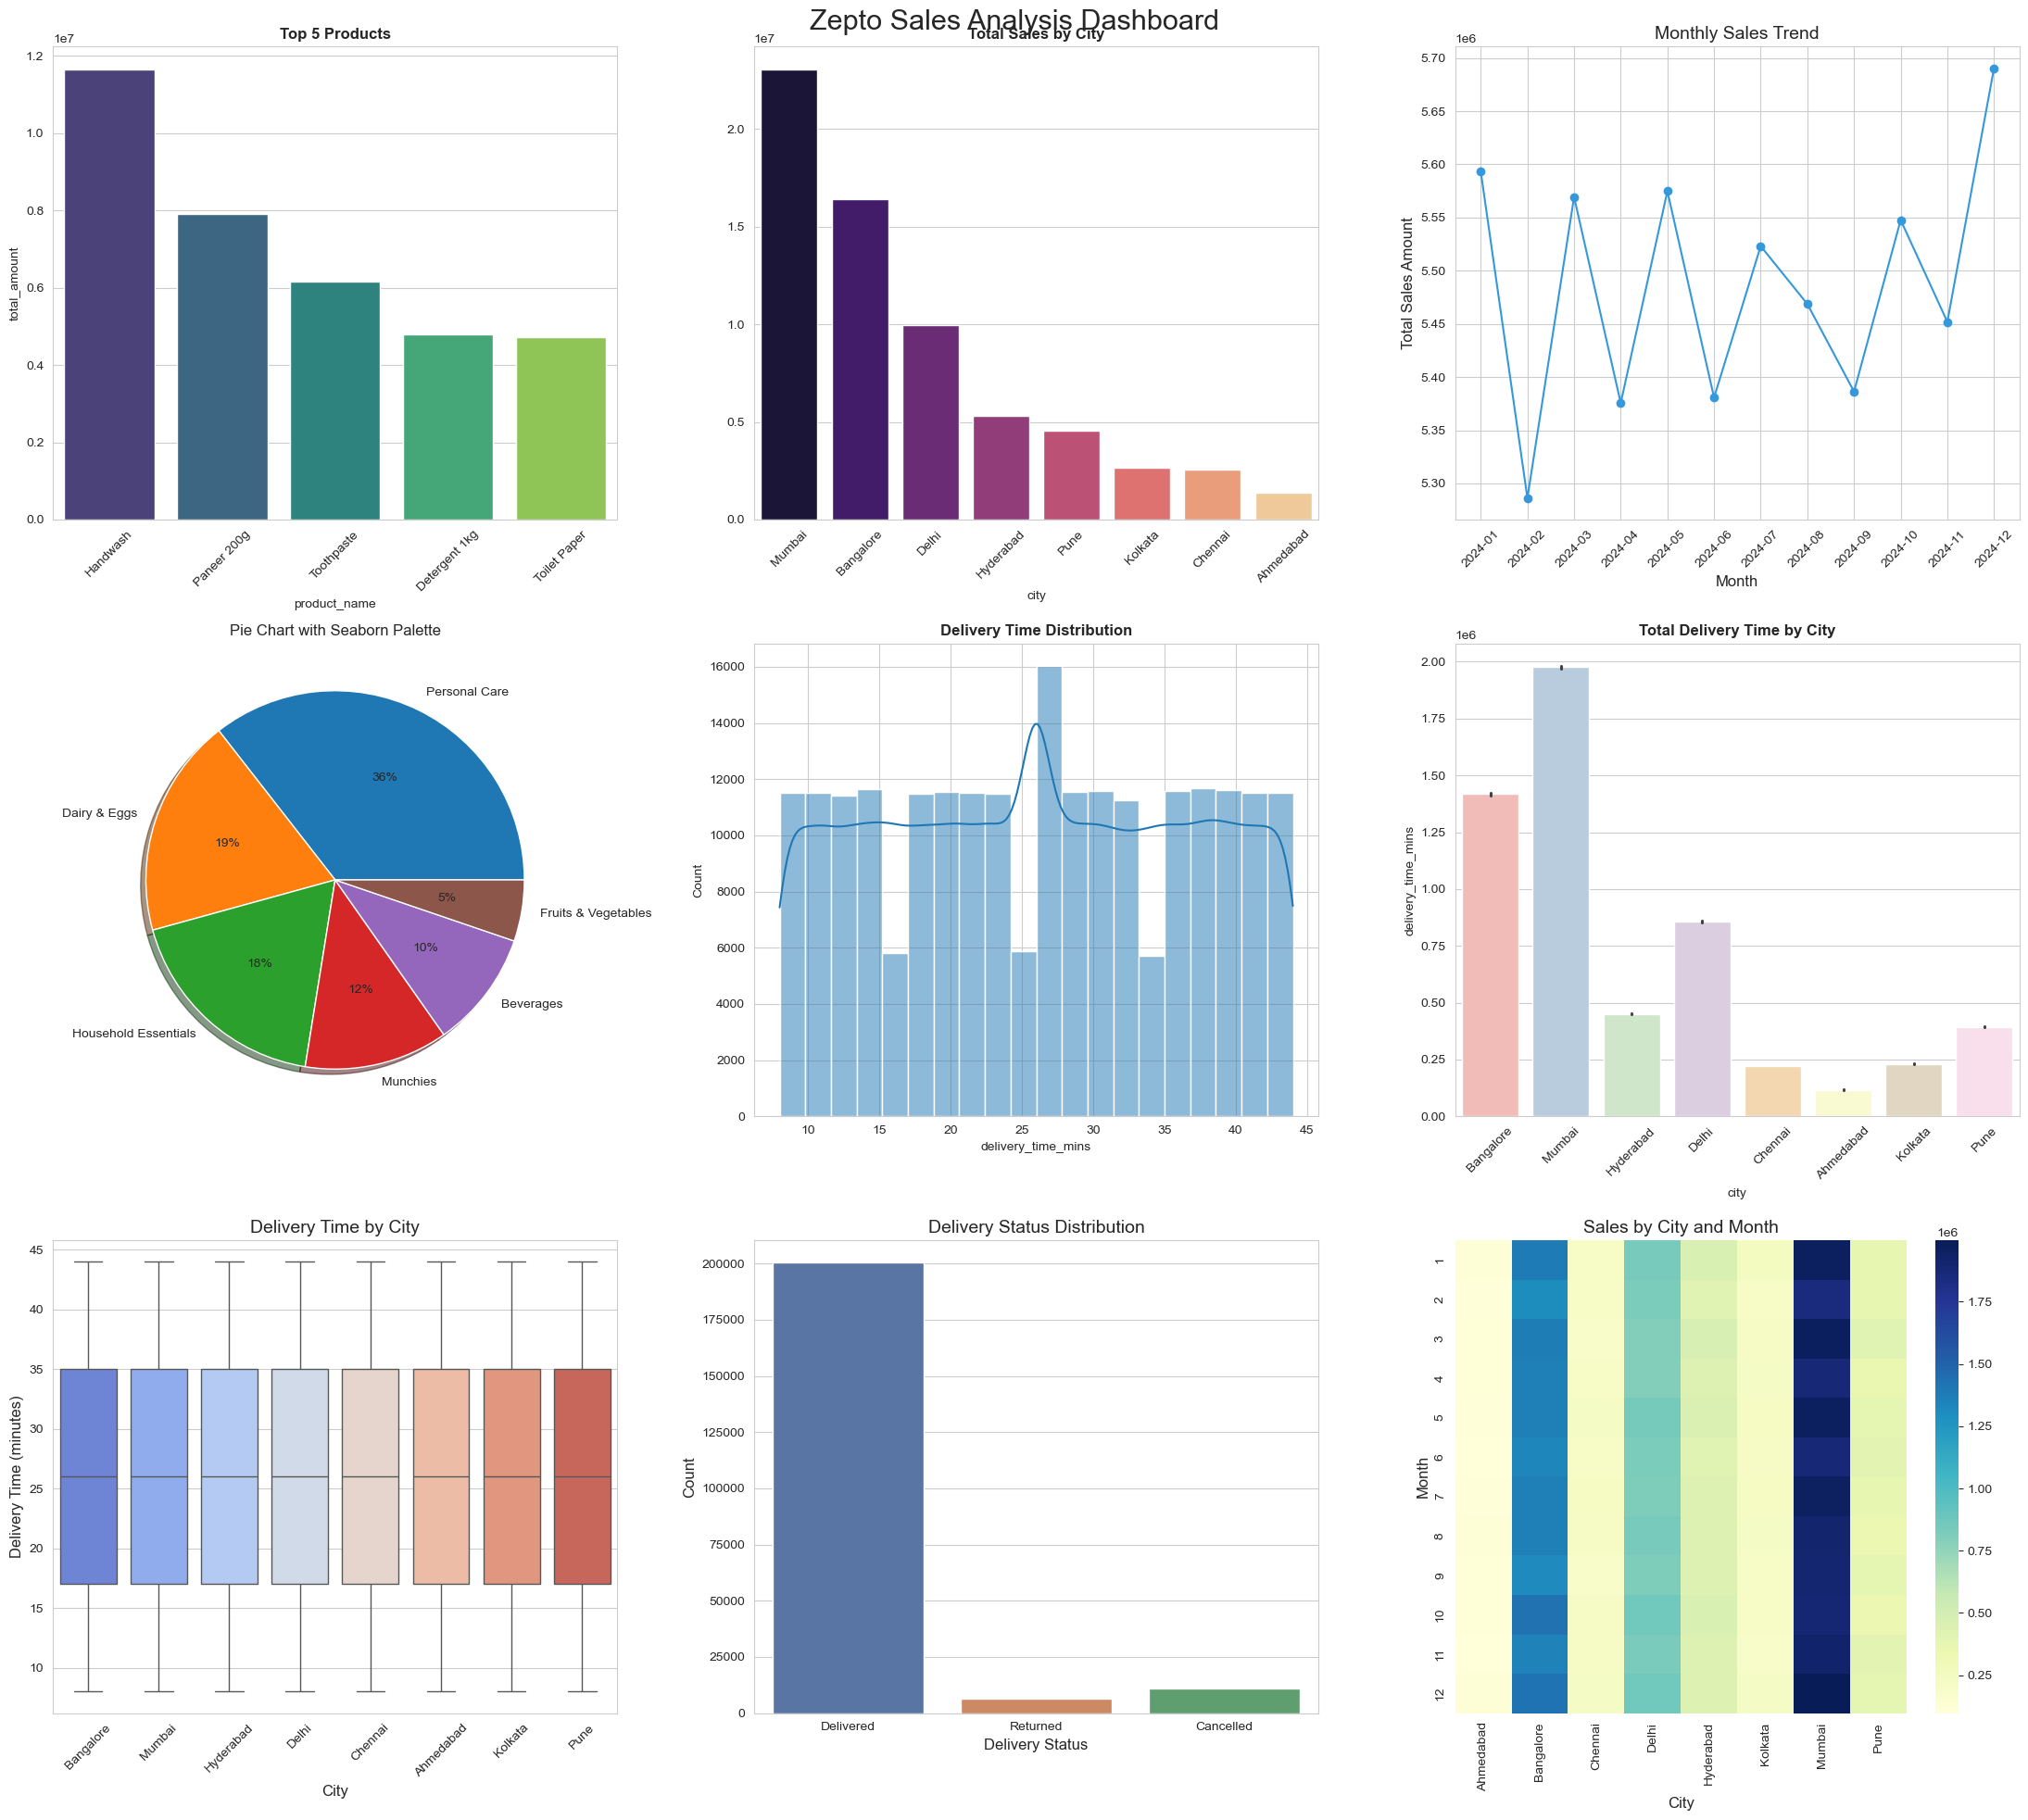

In [42]:
#Plotting using matplotlib and seaborn libraries
sns.set_style("whitegrid")

fig, axes = plt.subplots(3,3, figsize=(22, 20))
fig.suptitle("Zepto Sales Analysis Dashboard", fontsize=22)

# Plot 1 :- Top 5 Products
sns.barplot(
    x="product_name",
    y="total_amount",
    data=top_products_details,
    palette="viridis",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Top 5 Products",fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2 : - Sales by City
sns.barplot(
    x=sales_by_city.index,
    y=sales_by_city.values,
    palette="magma",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Total Sales by City",fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

#Plot 3 : - Monthly Sales Trend
axes[0, 2].plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='#3498DB')
axes[0, 2].set_title('Monthly Sales Trend', fontsize=14)
axes[0, 2].set_xlabel('Month', fontsize=12)
axes[0, 2].set_ylabel('Total Sales Amount', fontsize=12)
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(True)



# Plot 4 : - Sales by Category

axes[1,0].pie(sales_by_category, autopct='%0.0f%%',labels = sales_by_category.index, shadow=True)
axes[1,0].set_title('Pie Chart with Seaborn Palette')
# Plot 5 : -  Delivery Time Distribution
sns.histplot(
    df_sales["delivery_time_mins"],
    bins=20,
    kde=True,
    palette = "rocket",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Delivery Time Distribution",fontweight='bold')

# Plot 6 : -  Average Delivery Time by City
sns.barplot( 
    x="city",
    y="delivery_time_mins",
    data=df_sales,
    estimator=sum,
    palette="Pastel1",
    ax=axes[1, 2]
)
axes[1, 2].set_title("Total Delivery Time by City",fontweight='bold')
axes[1, 2].tick_params(axis='x', rotation=45)
#Plot 7 :-

sns.boxplot(x='city', y='delivery_time_mins', data=df_sales, palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('Delivery Time by City', fontsize=14)
axes[2, 0].set_xlabel('City', fontsize=12)
axes[2, 0].set_ylabel('Delivery Time (minutes)', fontsize=12)
axes[2, 0].tick_params(axis='x', rotation=45)

#Plot 8 : - Delivery Status Distribution (Count Plot)
sns.countplot(x='delivery_status', data=df_sales, palette='deep', ax=axes[2,1])
axes[2, 1].set_title('Delivery Status Distribution', fontsize=14)
axes[2, 1].set_xlabel('Delivery Status', fontsize=12)
axes[2, 1].set_ylabel('Count', fontsize=12)

#Plot 9
sales_city_month = df_sales.groupby([df_sales['order_date'].dt.month, 'city'])['total_amount'].sum().unstack(fill_value=0)
sns.heatmap(sales_city_month, cmap='YlGnBu', ax=axes[2, 2])
axes[2, 2].set_title('Sales by City and Month', fontsize=14)
axes[2, 2].set_xlabel('City', fontsize=12)
axes[2, 2].set_ylabel('Month', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()